<a href="https://colab.research.google.com/github/johanaluna/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Johana_DS7_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales_lastweek= [3505,2400,3027,2798,3700,3250,2689]

In [3]:
from functools import reduce

def meanMedianMode(numbers):

  #Mean:is the sum divided by the count.
  x= reduce((lambda x, y: x + y), numbers)
  mean= x/len(numbers)

  #Variance:The average of the squared differences from the Mean.
  var_result= (sum((x-mean)**2 for x in numbers)/len(numbers))

  #Standard Deviation: is the square root of the Variance.
  stand_dev= np.sqrt(var_result)

  return {'Mean: ':mean, 'Variance': var_result, 'Standard deviation':stand_dev, }


meanMedianMode(sales_lastweek)

{'Mean: ': 3052.714285714286,
 'Standard deviation': 428.67360686714756,
 'Variance': 183761.06122448976}

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers_lastweek=[127,80,105,92,120,115,93]

In [5]:
S=np.stack((sales_lastweek,customers_lastweek), axis=0)
S

array([[3505, 2400, 3027, 2798, 3700, 3250, 2689],
       [ 127,   80,  105,   92,  120,  115,   93]])

In [6]:
cov_S=np.cov(S)
cov_S

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [7]:
cov_sales=np.cov(sales_lastweek,customers_lastweek)
cov_sales

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [8]:
def mymean(numbers):
    #Mean:is the sum divided by the count.
    x= reduce((lambda x, y: x + y), numbers)
    mean = x/len(numbers)
    return mean

def myvar(numbers):
  #Variance:The average of the squared differences from the Mean.
  var_result= (sum((x-mymean(numbers))**2 for x in numbers)/(len(numbers)-1))
  return var_result

def mystandard(numbers):
  #Standard Deviation: is the square root of the Variance.
  stand_dev= np.sqrt(myvar(numbers))
  return stand_dev

std_customers=mystandard(customers_lastweek)
std_sales=mystandard(sales_lastweek)
print('Customer Standard Deviation from function: ',std_customers)
print('Customer Standard Deviation from library:  ',np.std(customers_lastweek, ddof=1))

print('Sales Standard Deviation from function: ',std_sales)
print('Sales Standard Deviation from library:  ',np.std(sales_lastweek, ddof=1))


Customer Standard Deviation from function:  17.057326313123664
Customer Standard Deviation from library:   17.057326313123664
Sales Standard Deviation from function:  463.0204150595357
Sales Standard Deviation from library:   463.0204150595357


In [0]:
data={'Sales': sales_lastweek,'Customer': customers_lastweek}

In [10]:
df=pd.DataFrame(data)
df

,Sales,Customer
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [11]:
df.cov()

,Sales,Customer
Sales,214387.904762,7604.357143
Customer,7604.357143,290.952381


In [12]:
np.cov(sales_lastweek,customers_lastweek, ddof=1)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [13]:
df.corr()

,Sales,Customer
Sales,1.000000,0.962834
Customer,0.962834,1.000000


In [14]:
np.corrcoef(sales_lastweek,customers_lastweek)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [15]:
correlation_data= np.cov(sales_lastweek,customers_lastweek)/(std_sales*std_customers)
correlation_data

array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

In [16]:
correlation_data2= np.cov(sales_lastweek,customers_lastweek)/(np.sqrt(np.var(sales_lastweek,ddof=1)*np.var(customers_lastweek,ddof=1)))
correlation_data2

array([[27.14495851,  0.96283398],
       [ 0.96283398,  0.03683925]])

In [17]:
from scipy.stats import pearsonr
correlation, _= pearsonr(sales_lastweek,customers_lastweek)
print('Pearsons correlation:',correlation)

Pearsons correlation: 0.9628339778148907


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [18]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df_titanic=pd.read_csv(url,sep=',')
df_titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [19]:
df_titanic.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [20]:
df_titanic.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [21]:
df_titanic.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

Perpendicular

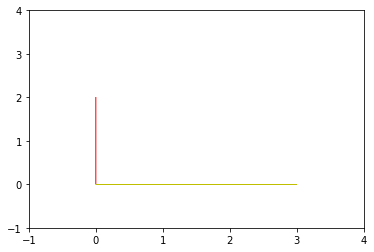

In [22]:
import matplotlib.pyplot as plt


a = [0,2]
b = [3,0]

fig = plt.figure()
plt.arrow(0,0,a[0],a[1],linewidth=0.5, color='r')
plt.arrow(0,0,b[0],b[1], linewidth=0.5, color='y')
plt.xlim(-1,4)
plt.ylim(-1,4)
plt.show()


## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [23]:
a=[-5,3,7]
np_a=np.array(a)
b=[6,-8,2]
np_b=np.array(b)

dot_ab=np.dot(np_a,np_b)
if dot_ab ==0:
  print('they are orthogonal')
else:
  print('They are not orthogonal ')

They are not orthogonal 


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [24]:
c=[2,-15,6,20]
np_c=np.array(c)
exp_norma_c=(np.linalg.norm(c))**2
print('norm ^2=',exp_norma_c)
dot_c= np.dot(np_c,np_c)
print('Dot product=',dot_c)
c_transpose=np_c.T
c_transpose_c=np.matmul(c_transpose,np_c)
print('transpose c _c= ',c_transpose_c)

norm ^2= 665.0
Dot product= 665
transpose c _c=  665


they are the same 


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [25]:
np_d=np.array([7,12])
np_e=np.array([2,11,-8])
norm_d=np.linalg.norm(np_d)
norm_e=np.linalg.norm(np_e)
print('norm d:',norm_d)
print('nomr e:',norm_e)

norm d: 13.892443989449804
nomr e: 13.74772708486752


 \begin{align}
 ||d|| = \sqrt{7^2 +12^2} = \sqrt{49 + 144} = \sqrt{193} = 13.89
\end{align}

 \begin{align}
 ||e|| = \sqrt{2^2 +11^2 +(-8)^2} = \sqrt{4+ 121 + 64} = \sqrt{141} = 13.74
\end{align}

 \begin{align}
 \hat{d} = \frac{1}{||d||}d = \frac{1}{13.89} \begin{bmatrix} 7 \\ 12  \end{bmatrix} = \begin{bmatrix} \ 0.5039 \\ \ 166.68 \\  \end{bmatrix}
\end{align}


 \begin{align}
 \hat{e} = \frac{1}{||e||}e = \frac{1}{11.8743}\begin{bmatrix} 2 \\ 11 \\  -8 \end{bmatrix} = \begin{bmatrix} \ 0.1455 \\ \ 0.8005 \\  \ -0.5822 \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + (-8)\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}= 2\hat{i} + 11\hat{j} + (-8)\hat{k}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [26]:
np_f=np.array([4,12,11,9,2])
norm_f=np.linalg.norm(np_f)
print('norm f:',norm_f)

norm f: 19.131126469708992


 \begin{align}
 ||f|| = \sqrt{4^2 +12^2 +11^2 + 9^2+ 2^2} = \sqrt{16 + 144 + 121 + 81 + 4}  = 19.13
\end{align}



In [27]:
np_f/norm_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(-0.5, 2)

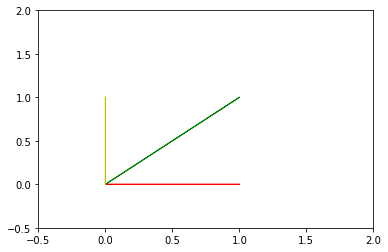

In [31]:
a = [1,0]
b = [1,1]
c = [0,1]

fig = plt.figure()
ax = plt.gca()
plt.arrow(0,0,a[0],a[1], color='r', label='A')
plt.arrow(0,0,b[0],b[1], color='g', label='B')
plt.arrow(0,0,c[0],c[1], linewidth = 1, color='y', label='C')
plt.xlim(-0.5,2)
plt.ylim(-0.5, 2)

# A and B are linearly dependent
# A and C are linearly independent

In [29]:
array_abc= np.array(a+b+c)
matrix_rank(array_abc)

NameError: ignored

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
from numpy.linalg import matrix_rank

In [0]:
np_g=np.array([1,2])
np_h=np.array([4,8])

fig = plt.figure()
plt.arrow(0,0,np_g[0],np_g[1], head_width=.5, head_length=0.25, color ='blue',linewidth=2)
plt.arrow(0,0,np_h[0],np_h[1],head_width=.5, head_length=0.25, color ='y')

plt.xlim(-10,5)
plt.ylim(-10, 10)
#the span is equal 1

In [0]:
stack_gh=np.row_stack([np_g,np_h])
det_gh=np.linalg.det(stack_gh)
det_gh

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]

array = np.array([l + m + n]) .reshape(3,3).T
# np.ndim(array)
array

In [0]:
 X, Y, Z = zip(*array)
 ini=np.array([0,0,0])

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
colors = ['b','r','k']
ax = fig.add_subplot(111, projection='3d')

ax.quiver(*ini,X,Y,Z, length=1, color='g')
ax.set_xlim([0, 9])
ax.set_ylim([0, 9])
ax.set_zlim([0, 9])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show();

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
import matplotlib.pyplot as plt


v1 = [0,2.5]
v2 = [2.5,0]

fig = plt.figure()
plt.arrow(0,0,v1[0],v1[1],linewidth=0.5, color='b')
plt.arrow(0,0,v2[0],v2[1], linewidth=0.5, color='g')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.show()


  # perpendicular, unrelated 

In [0]:
np.dot(v1,v2) # dot product = 0  they are orthogonal

## 6.2 What does it mean to form a basis?

A basis of a vector space is any linearly independent subset of it that spans the whole vector space. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
np_p= np.array([[1,2,3],[-1,0,7],[4,8,2]])
np_p

In [0]:
np.linalg.matrix_rank(np_p)

## 7.2 What does the rank of a matrix tell us?

the maximun number od linearly independent rows or columns 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


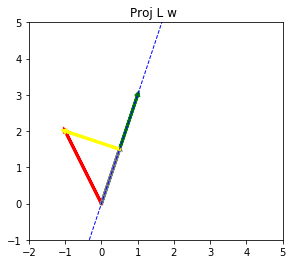

[0.5 1.5]


In [57]:
# Plot a line
plt.xlim(-2,5)          
plt.ylim(-1,5)


v=[1,3]
w=[-1,2]
w_l=np.dot(v,w)
proj = np.multiply(w_l,v)

x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

x_minus_proj = w-u

u=np.multiply((np.dot(v,w)/np.dot(v,v)),v)

axes = plt.gca()
plt.axes().set_aspect('equal')
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
#plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')

plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, u[0], u[1], linewidth=3, head_width=.05, head_length=0.03, color ='gray')
plt.arrow(u[0], u[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("Proj L w ")
plt.show();

print(u)

In [0]:
#https://textbooks.math.gatech.edu/ila/projections.html


# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

In [0]:
np.column_stack((x_values,y_values))